In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies
from sklearn.preprocessing import StandardScaler
from scipy.stats import iqr


In [254]:
data = pd.read_csv("walmart.csv")
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [255]:
data.shape

(550068, 10)

In [256]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [258]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [259]:
data.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [260]:
data.duplicated().sum()

np.int64(0)

In [261]:
print(data.nunique())

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64


In [262]:
for col in data.columns:
    print(f"Unique values in {col}:")
    print(data[col].unique())

Unique values in User_ID:
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
Unique values in Product_ID:
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Unique values in Gender:
['F' 'M']
Unique values in Age:
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Unique values in Occupation:
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Unique values in City_Category:
['A' 'C' 'B']
Unique values in Stay_In_Current_City_Years:
['2' '4+' '3' '1' '0']
Unique values in Marital_Status:
[0 1]
Unique values in Product_Category:
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Unique values in Purchase:
[ 8370 15200  1422 ...   135   123   613]


In [263]:
print(data.columns)

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')


In [264]:
age_mapping = {"0-17":0, "18-25":1,"26-35":2,"36-45":3,"46-50":4, "51-55":5, "55+":6}
data["Age"]=data["Age"].map(age_mapping)
print(data["Age"])


0         0
1         0
2         0
3         0
4         6
         ..
550063    5
550064    2
550065    2
550066    6
550067    4
Name: Age, Length: 550068, dtype: int64


In [265]:
Le = LabelEncoder()
data['Gender'] = Le.fit_transform(data['Gender'])
print(data['Gender'])

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: int64


In [266]:
data = get_dummies(data,columns=["City_Category"])
print(data)

        User_ID Product_ID  Gender  Age  Occupation  \
0       1000001  P00069042       0    0          10   
1       1000001  P00248942       0    0          10   
2       1000001  P00087842       0    0          10   
3       1000001  P00085442       0    0          10   
4       1000002  P00285442       1    6          16   
...         ...        ...     ...  ...         ...   
550063  1006033  P00372445       1    5          13   
550064  1006035  P00375436       0    2           1   
550065  1006036  P00375436       0    2          15   
550066  1006038  P00375436       0    6           1   
550067  1006039  P00371644       0    4           0   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  \
0                               2               0                 3      8370   
1                               2               0                 1     15200   
2                               2               0                12      1422   
3              

In [267]:
int_change = ["City_Category_A", "City_Category_B", "City_Category_C"]
data[int_change] = data[int_change].astype(int)
print(data["City_Category_A"])
print(data['City_Category_B'])
print(data['City_Category_C'])

0         1
1         1
2         1
3         1
4         0
         ..
550063    0
550064    0
550065    0
550066    0
550067    0
Name: City_Category_A, Length: 550068, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
550063    1
550064    0
550065    1
550066    0
550067    1
Name: City_Category_B, Length: 550068, dtype: int64
0         0
1         0
2         0
3         0
4         1
         ..
550063    0
550064    1
550065    0
550066    1
550067    0
Name: City_Category_C, Length: 550068, dtype: int64


In [268]:
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].replace('4+',4).astype(int)
print(data['Stay_In_Current_City_Years'])

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: int64


In [269]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,City_Category_A,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,2,0,3,8370,1,0,0
1,1000001,P00248942,0,0,10,2,0,1,15200,1,0,0
2,1000001,P00087842,0,0,10,2,0,12,1422,1,0,0
3,1000001,P00085442,0,0,10,2,0,12,1057,1,0,0
4,1000002,P00285442,1,6,16,4,0,8,7969,0,0,1


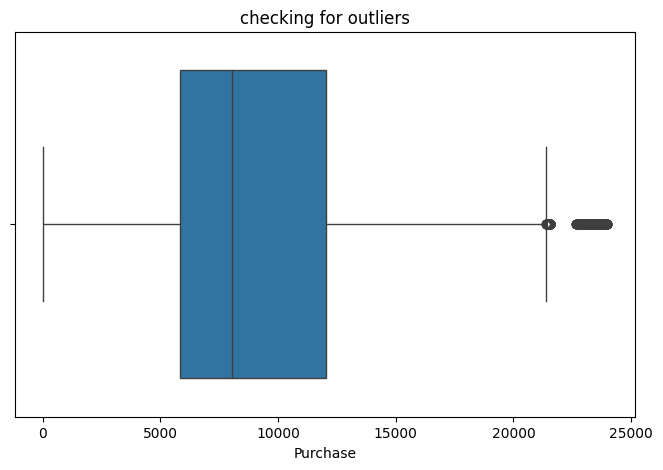

In [270]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data["Purchase"])
plt.title("checking for outliers")
plt.show()

In [271]:
q1 = data['Purchase'].quantile(0.25)
q3 = data['Purchase'].quantile(0.75)
iqr = q3 - q1
lw = q1 - 1.5 * iqr
uw = q3 + 1.5 * iqr
data = data[(data['Purchase'] >= lw) & (data['Purchase'] <= uw)]
print(data['Purchase'])

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 547391, dtype: int64


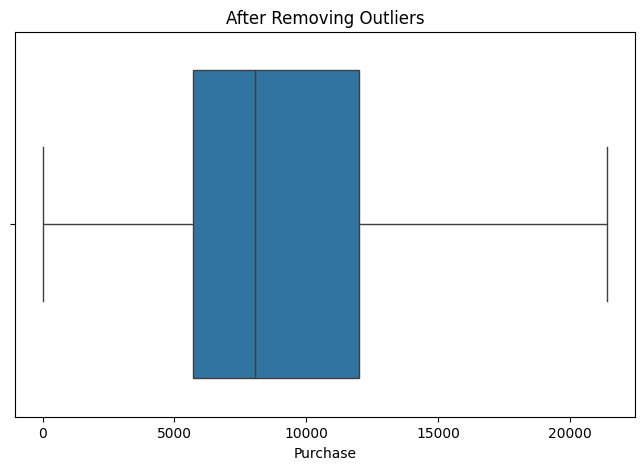

In [272]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data["Purchase"])
plt.title("After Removing Outliers")
plt.show()

In [273]:
scaler = StandardScaler()
data["Purchase_Scaled"] = scaler.fit_transform(data[["Purchase"]])

In [274]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,City_Category_A,City_Category_B,City_Category_C,Purchase_Scaled
0,1000001,P00069042,0,0,10,2,0,3,8370,1,0,0,-0.167169
1,1000001,P00248942,0,0,10,2,0,1,15200,1,0,0,1.215739
2,1000001,P00087842,0,0,10,2,0,12,1422,1,0,0,-1.573969
3,1000001,P00085442,0,0,10,2,0,12,1057,1,0,0,-1.647873
4,1000002,P00285442,1,6,16,4,0,8,7969,0,0,1,-0.248362


In [275]:
data.dtypes

,0
User_ID,int64
Product_ID,object
Gender,int64
Age,int64
Occupation,int64
Stay_In_Current_City_Years,int64
Marital_Status,int64
Product_Category,int64
Purchase,int64
City_Category_A,int64


In [276]:
data = data.drop(columns=["Product_ID", "User_ID"])

In [277]:
data.dtypes

,0
Gender,int64
Age,int64
Occupation,int64
Stay_In_Current_City_Years,int64
Marital_Status,int64
Product_Category,int64
Purchase,int64
City_Category_A,int64
City_Category_B,int64
City_Category_C,int64


In [278]:
data.head(5)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,City_Category_A,City_Category_B,City_Category_C,Purchase_Scaled
0,0,0,10,2,0,3,8370,1,0,0,-0.167169
1,0,0,10,2,0,1,15200,1,0,0,1.215739
2,0,0,10,2,0,12,1422,1,0,0,-1.573969
3,0,0,10,2,0,12,1057,1,0,0,-1.647873
4,1,6,16,4,0,8,7969,0,0,1,-0.248362


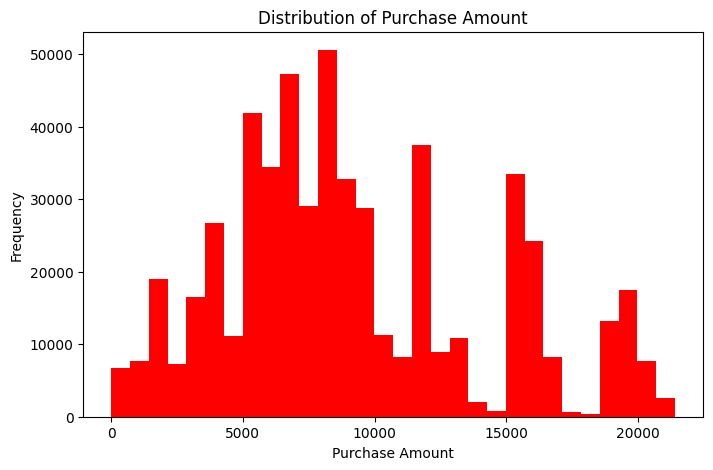

In [279]:
plt.figure(figsize=(8, 5))
plt.hist(data["Purchase"], bins=30, color='red')
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Purchase Amount")
plt.show()

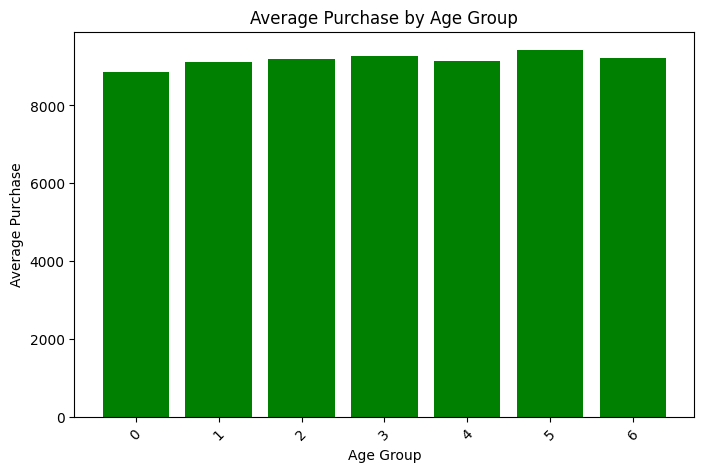

In [280]:
avg_purchase = data.groupby("Age")["Purchase"].mean()
plt.figure(figsize=(8, 5))
plt.bar(avg_purchase.index,avg_purchase.values, color='green')
plt.xlabel("Age Group")
plt.ylabel("Average Purchase")
plt.title("Average Purchase by Age Group")
plt.xticks(rotation=45)
plt.show()

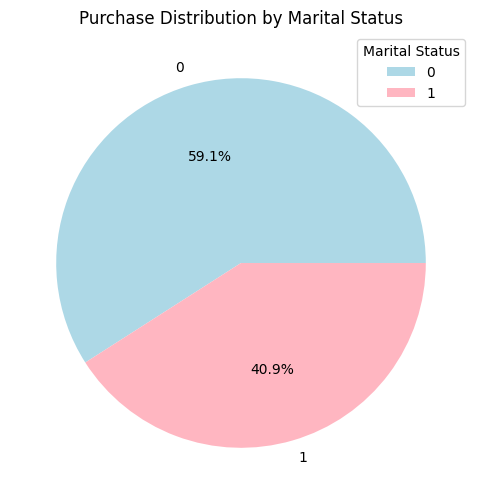

In [281]:
marital_sales = data.groupby("Marital_Status")["Purchase"].count().reset_index()
plt.figure(figsize=(7,6))
plt.pie(marital_sales["Purchase"], labels=marital_sales["Marital_Status"], autopct='%1.1f%%', colors=["lightblue", "lightpink"])
plt.title("Purchase Distribution by Marital Status")
plt.legend(title="Marital Status")
plt.show()

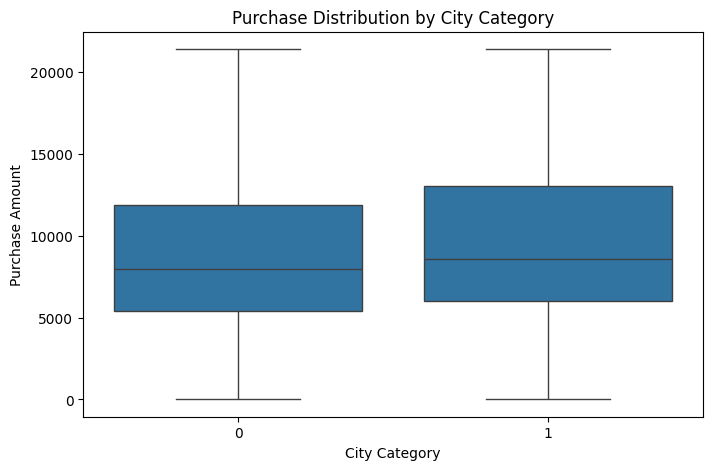

In [282]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="City_Category_C", y="Purchase", data=data)
plt.xlabel("City Category")
plt.ylabel("Purchase Amount")
plt.title("Purchase Distribution by City Category")
plt.show()

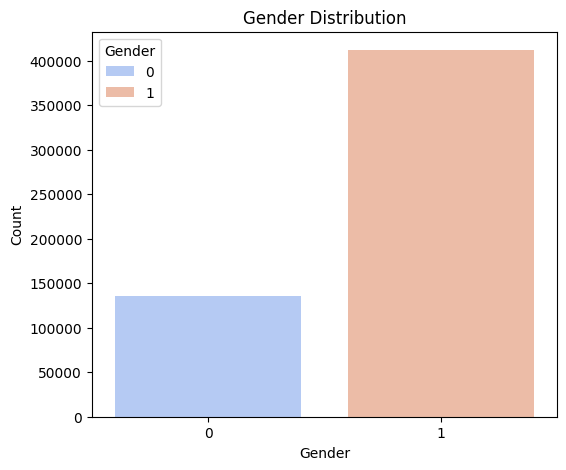

In [283]:
plt.figure(figsize=(6, 5))
sns.countplot(x="Gender", data=data, palette="coolwarm",hue="Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()


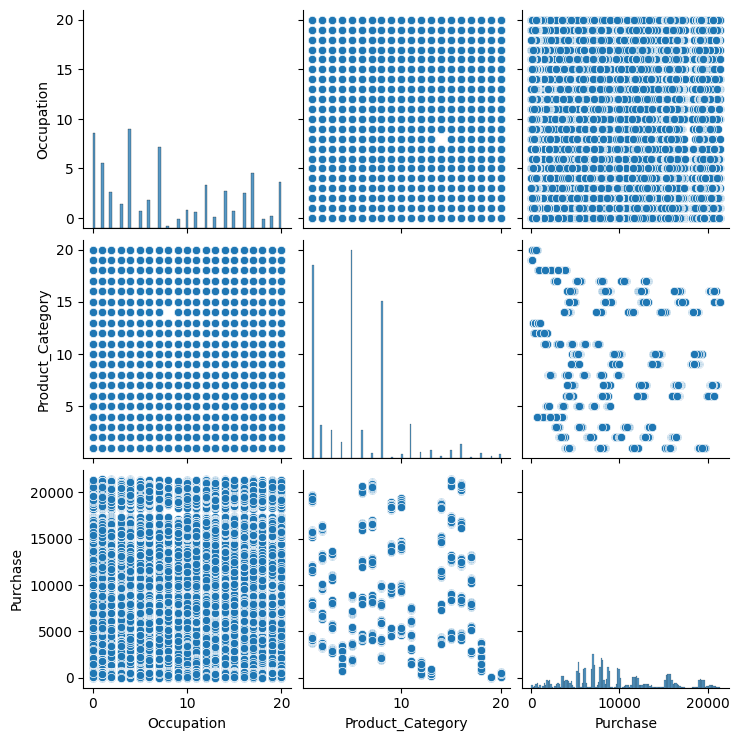

In [284]:
sns.pairplot(data[["Occupation", "Product_Category", "Purchase"]])
plt.show()